In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [12]:
def gaussian_beam(x,y,z,w_0,lamb,E_0):
    
    #wave number k
    k = 2*np.pi/lamb
    
    #below constants are as defined in the paper
    z_R = np.pi*w_0**2/lamb 
    w_z = w_0*np.sqrt(1+(z/z_R)**2)
    
    #Rz tends to infinity as z tends to 0. Which is why this ifelse condition is required
    if abs(z) < 1e-50:
        R_z = 1e100
    else:
        R_z = z*(1+(z_R/z)**2)

    phi_z = np.arctan(z/z_R)
    
    #This is the coeff of i in the exponential. 
    theta = k*z - phi_z + k*(x**2+y**2)/2*R_z

    #Following are the magnitude, real part and imaginary part respectively of the electric field of incident light
    E_0_xyz = (w_0/w_z)*np.exp(-1*(x**2+y**2)/w_z**2)
    E_0_xyz = E_0_xyz*E_0
    
    E_0_xyz_re = (w_0/w_z)*np.exp(-1*(x**2+y**2)/w_z**2)*np.cos(theta)
    E_0_xyz_re = E_0_xyz_re*E_0
    
    E_0_xyz_im = (w_0/w_z)*np.exp(-1*(x**2+y**2)/w_z**2)*np.sin(theta)
    E_0_xyz_im = E_0_xyz_im*E_0
    
    return [E_0_xyz, E_0_xyz_re, E_0_xyz_im]


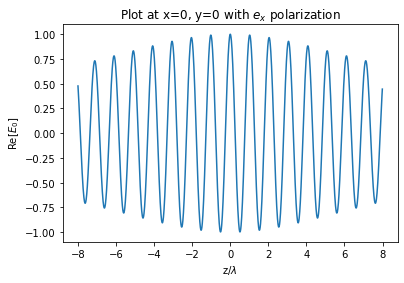

In [13]:
#polaization direction
e_x = np.array([1,0.,0.])
#wavelength
lamb = 1
#waist
w_0 = 1.56*lamb

#position of x,y at which values of electric field along z axis are plotted
x = 0
y = 0

#initialization
E_0 = np.array([0,0,0])
re_E_0 = np.array([0,0,0])
im_E_0 = np.array([0,0,0])

#range of z
z = np.arange(-8*lamb, 8*lamb, 0.01)

for i in z:
    
    E_0_i = gaussian_beam(x,y,i,w_0,lamb,e_x)[0]
    re_E_0_i = gaussian_beam(x,y,i,w_0,lamb,e_x)[1]
    im_E_0_i = gaussian_beam(x,y,i,w_0,lamb,e_x)[2]
    
    E_0 = np.vstack([E_0, E_0_i])
    re_E_0 = np.vstack([re_E_0, re_E_0_i])
    im_E_0 = np.vstack([im_E_0, im_E_0_i])

#deleting first row added during initialization
E_0 = np.delete(E_0,0,0)
re_E_0 = np.delete(re_E_0,0,0)
im_E_0 = np.delete(im_E_0,0,0)

plt.plot(z,re_E_0[:,0]) #plotting only x component as remaining components are 0 because of polarization
plt.xlabel('z/$\lambda$')
plt.ylabel('Re[$E_0$]')
plt.title('Plot at x=0, y=0 with $e_x$ polarization')
# function to show the plot
plt.show()

In [14]:
#Field value at points where atoms are placed i.e. z=0

#n is number of atoms in one row/column
n=26
N=n**2
#separation between atoms
a=0.2*lamb

E_n = np.array([0,0,0])
re_E_n = np.array([0,0,0])
im_E_n = np.array([0,0,0])

#position of atoms is at (x,y,0)
x = np.arange(-(n-1)*a/2, (n)*a/2, a)
y = np.arange(-(n-1)*a/2, (n)*a/2, a)
z=0

for j in y:
    for i in x:
        E_n_i = gaussian_beam(i,j,z,w_0,lamb,e_x)[0]
        re_E_n_i = gaussian_beam(i,j,z,w_0,lamb,e_x)[1]
        im_E_n_i = gaussian_beam(i,j,z,w_0,lamb,e_x)[2]
    
        E_n = np.vstack([E_n, E_n_i])
        re_E_n = np.vstack([re_E_n, re_E_n_i])
        im_E_n = np.vstack([im_E_n, im_E_n_i])
    
E_n = np.delete(E_n,0,0)
re_E_n = np.delete(re_E_n,0,0)
im_E_n = np.delete(im_E_n,0,0)

#shape of each E_n, re_E_n, im_E_n is 26*26 x 3.
print(E_n.shape)

(676, 3)


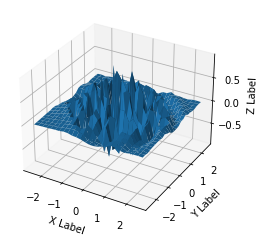

In [15]:
#Trying out different plots
X, Y = np.meshgrid(x, y)
Z = np.reshape(re_E_n[:,0], X.shape)  # Z.shape must be equal to X.shape = Y.shape

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

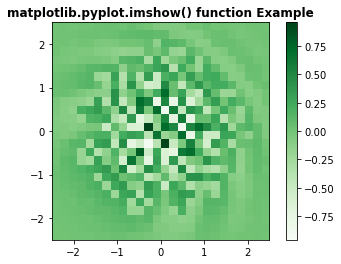

In [16]:
#Trying out different plots
z_min, z_max = -np.abs(re_E_n[:,0]).max(), np.abs(re_E_n[:,0]).max()

fig, ax = plt.subplots()

c = plt.imshow(re_E_n[:,0].reshape(26,26), cmap ='Greens', vmin = z_min, vmax = z_max, extent =[x.min(), x.max(), y.min(), y.max()], interpolation ='nearest', origin ='lower')
plt.colorbar(c)
  
plt.title('matplotlib.pyplot.imshow() function Example', 
                                     fontweight ="bold")
plt.show()

In [17]:
'''Final 3N vector of electric field (magnitude, real part and imaginary part are separated). Here, the order goes as 
(-(n-1)*a/2,-(n-1)*a/2); (-(n+1)*a/2,-(n-1)*a/2); (-(n+3)*a/2,-(n-1)*a/2); ... ((n-1)*a/2,-(n-1)*a/2);  
(-(n-1)*a/2,-(n+1)*a/2); ...                                                   ((n-1)*a/2,-(n+1)*a/2);
.
.
.
(-(n-1)*a/2,(n-1)*a/2); ...                                                    ((n-1)*a/2,(n-1)*a/2)

where (x,y) represent coordinates of the atoms.
'''
E_n = E_n.flatten()
re_E_n = re_E_n.flatten()
im_E_n = im_E_n.flatten()